In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import  numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential,Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16

In [3]:
train_datagen=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)
train_data=train_datagen.flow_from_directory(directory="C:/Users/balaj/Documents/Minor Project/CovidDataset-20200427T133042Z-001/CovidDataset/Train",target_size=(224,224),batch_size=1,class_mode="binary")

Found 224 images belonging to 2 classes.


In [4]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [5]:
tesr_datagen=image.ImageDataGenerator(rescale=1/255)
test_data=train_datagen.flow_from_directory(directory="C:/Users/balaj/Documents/Minor Project/CovidDataset-20200427T133042Z-001/CovidDataset/Val",target_size=(224,224),batch_size=1,class_mode="binary")

Found 60 images belonging to 2 classes.


In [6]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [8]:
model.fit_generator(train_data,steps_per_epoch=8,epochs=30,validation_steps=2,validation_data=test_data)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
8/8 [==============================] - 2s 241ms/step - loss: 1.0577 - acc: 0.5000 - val_loss: 0.7288 - val_acc: 0.0000e+00
Epoch 2/30
8/8 [==============================] - 2s 208ms/step - loss: 0.7107 - acc: 0.5000 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 3/30
8/8 [==============================] - 2s 214ms/step - loss: 0.6738 - acc: 0.5000 - val_loss: 0.6886 - val_acc: 0.5000
Epoch 4/30
8/8 [==============================] - 2s 229ms/step - loss: 0.4389 - acc: 0.8750 - val_loss: 0.6551 - val_acc: 0.5000
Epoch 5/30
8/8 [==============================] - 2s 226ms/step - loss: 0.8347 - acc: 0.6250 - val_loss: 0.5695 - val_acc: 1.0000
Epoch 6/30
8/8 [==============================] - 2s 215ms/step - loss: 0.7548 - acc: 0.3750 - val_loss: 0.6894 - val_acc: 0.5000
Epoch 7/30
8/8 [==============================] - 2s 291ms/step - loss: 0.7734 - acc: 0.3750 - val_loss: 0.6913 - val_acc: 1.0000
Epoch 8/30

In [9]:
path='C:/Users/balaj/Documents/Minor Project/CovidDataset-20200427T133042Z-001/CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg'
img=image.load_img(path,target_size=(224,224))
img=image.img_to_array(img)/255
img=np.array([img])
img.shape

(1, 224, 224, 3)

In [10]:
result=model.predict(img).astype("int32")
result

array([[0]])

In [11]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory="C:/Users/balaj/Documents/Minor Project/CovidDataset-20200427T133042Z-001/CovidDataset/Train"  , target_size=(224,224))

Found 224 images belonging to 2 classes.


In [12]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= "C:/Users/balaj/Documents/Minor Project/CovidDataset-20200427T133042Z-001/CovidDataset/Val" , target_size=(224,224), shuffle= False)

Found 60 images belonging to 2 classes.


In [13]:
train.class_indices

{'Covid': 0, 'Normal': 1}

In [14]:
class_type = {0:'Covid',  1 : 'Normal'}

In [15]:
t_img , label = train.next()

In [16]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


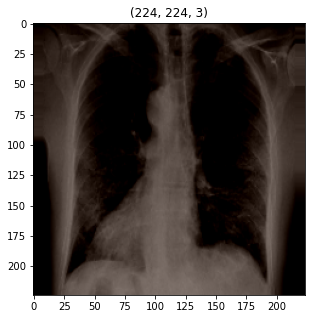

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


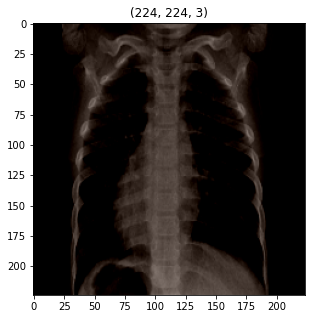

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


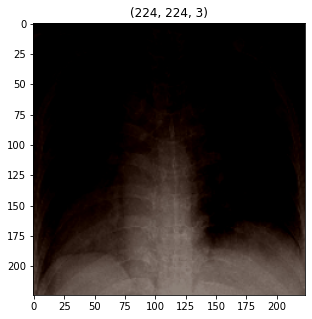

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


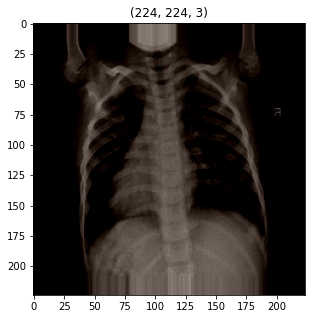

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


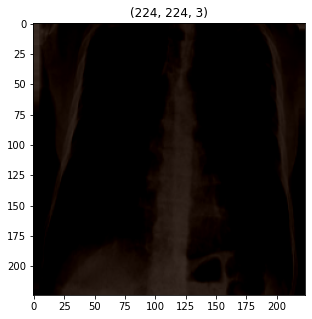

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


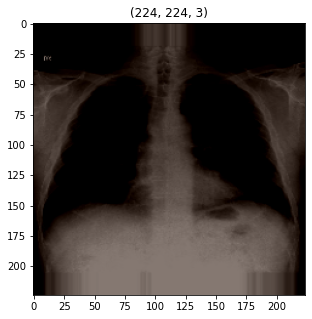

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


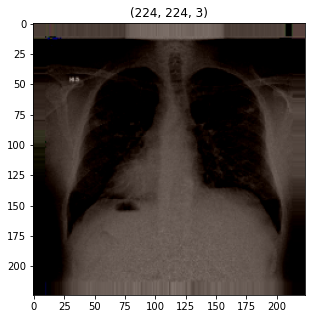

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


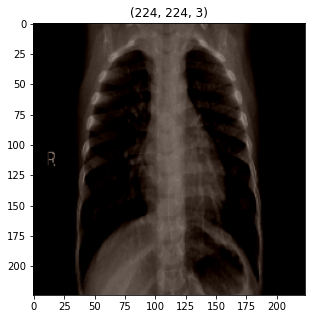

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


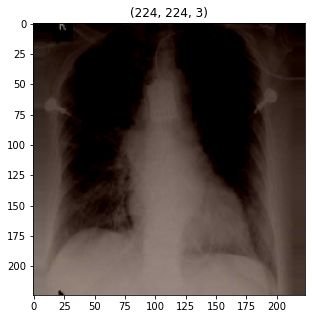

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


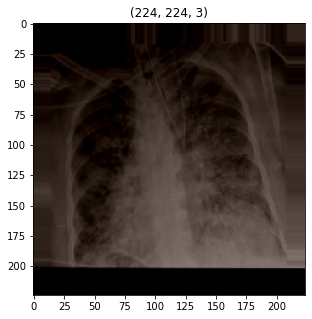

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


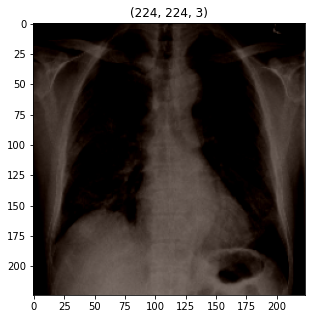

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


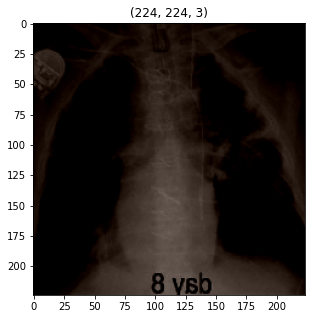

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


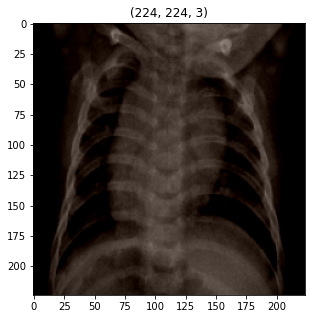

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


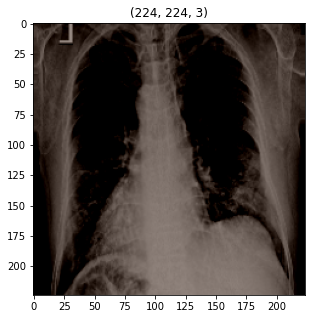

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


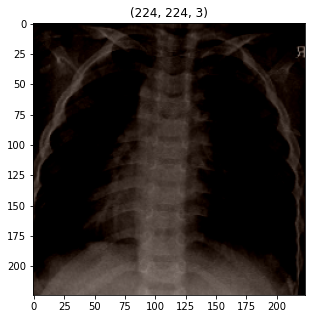

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


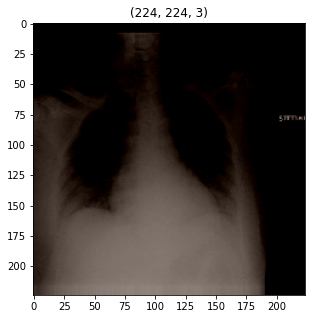

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


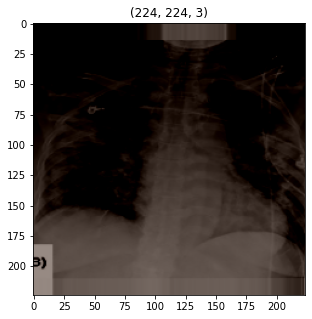

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


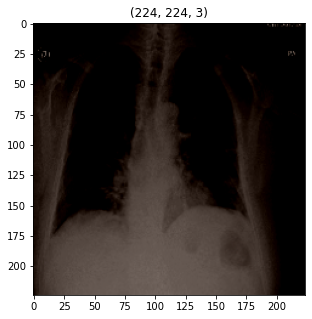

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


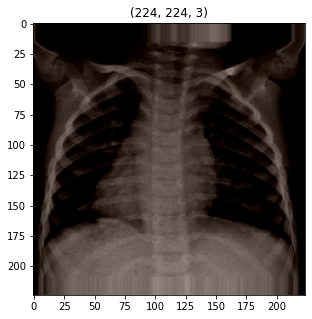

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


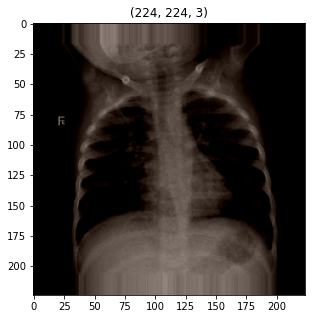

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


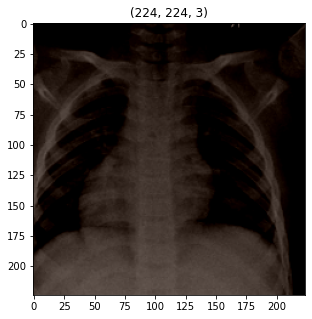

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


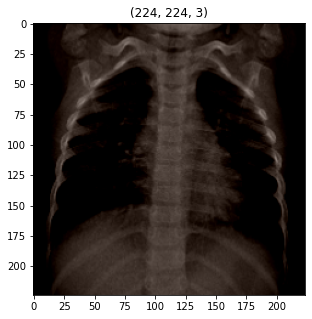

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


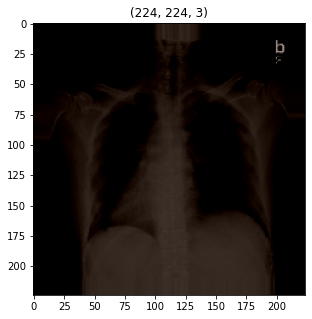

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


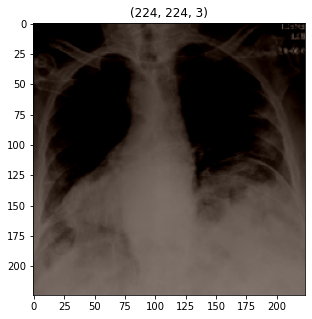

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


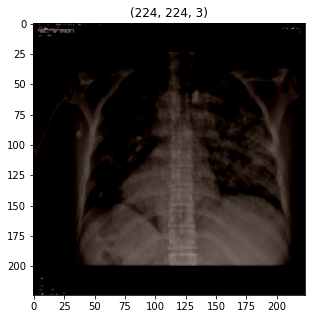

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


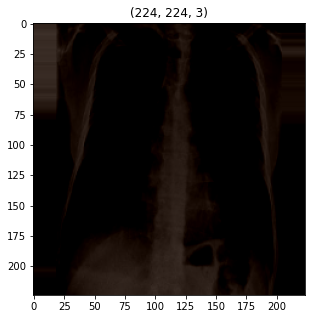

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


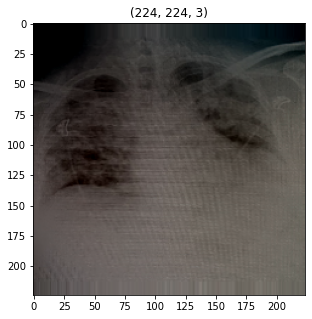

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


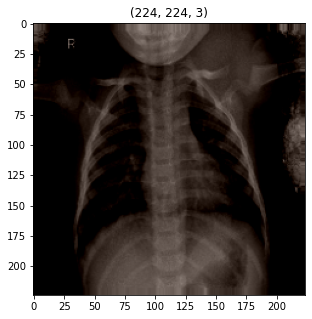

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


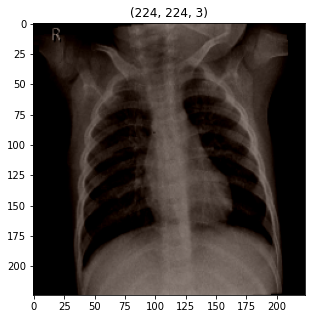

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


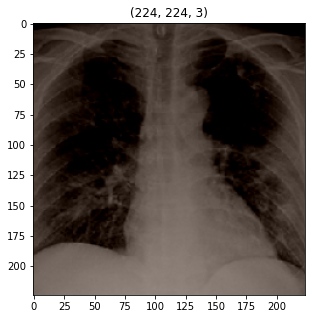

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


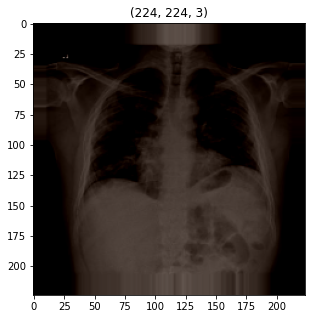

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


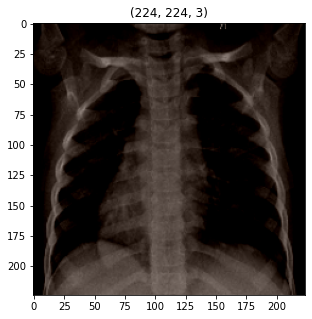

In [17]:
plotImages(t_img, label)

In [18]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [19]:
vgg = VGG16( input_shape=(224,224,3), include_top= False)

In [20]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [21]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [22]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [23]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [24]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [25]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30,  validation_steps= 32, callbacks=[es,mc])

Epoch 1/30
 7/10 [====================>.........] - 40s 6s/step - loss: 0.3142 - accuracy: 0.8438


In [26]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy'])

In [27]:
acc = model.evaluate_generator(generator= test)[1] 
print(f"The accuracy of your model is = {acc} %")

Instructions for updating:
Please use Model.evaluate, which supports generators.
The accuracy of your model is = 0.9666666388511658 %


In [28]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

The given X-Ray image is of type = Covid

The chances of image being Covid is : 60.6395959854126 percent

The chances of image being Normal is : 0.34141838550567627 percent


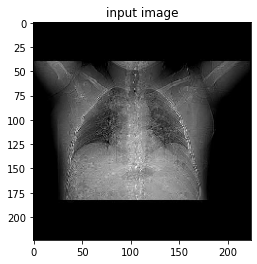

In [30]:
path = "C:/Users/balaj/Documents/Minor Project/CovidDataset-20200427T133042Z-001/CovidDataset/Val/Covid/covid-19-pneumonia-12.jpg"       # you can add any image path

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()